In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import logging
import warnings
from pathlib import Path
from time import time

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotnine as gg
import pymc3 as pm
import seaborn as sns

In [3]:
from src.analysis import pymc3_analysis as pmanal
from src.data_processing import achilles as achelp
from src.data_processing import common as dphelp
from src.exceptions import CacheDoesNotExistError
from src.io import cache_io
from src.io.models_io import models_dir
from src.loggers import logger, set_console_handler_level
from src.model_configuration import get_config_and_instantiate_model
from src.modeling import pymc3_sampling_api as pmapi
from src.models.speclet_eight import SpecletEight
from src.plot.color_pal import SeabornColor
from src.plot.plotnine_helpers import set_gg_theme
from src.project_config import read_project_configuration

In [4]:
notebook_tic = time()

warnings.simplefilter(action="ignore", category=UserWarning)
set_console_handler_level(logging.INFO)

set_gg_theme()
%config InlineBackend.figure_format = "retina"

RANDOM_SEED = 847
np.random.seed(RANDOM_SEED)

MODELING_CONFIG = read_project_configuration().modeling
HDI_PROB = MODELING_CONFIG.highest_density_interval

In [5]:
sp8 = get_config_and_instantiate_model(
    models_dir() / MODELING_CONFIG.models_config,
    name="eight-default",
    root_cache_dir=models_dir(),
)

[11/03/21 17:03:28] INFO     Instantiating and configuring a       ]8;id=771313;file:///Users/admin/Lab_Projects/speclet/src/model_configuration.py\model_configuration.py]8;;\:238
                             speclet model from config.

                    INFO     Creating a new SpecletEight object.          ]8;id=200481;file:///Users/admin/Lab_Projects/speclet/src/models/speclet_eight.py\speclet_eight.py]8;;\:94

                    INFO     Adding new transformation.                  ]8;id=539560;file:///Users/admin/Lab_Projects/speclet/src/managers/data_managers.py\data_managers.py]8;;\:171

                    INFO     Adding new transformation.                  ]8;id=374951;file:///Users/admin/Lab_Projects/speclet/src/managers/data_managers.py\data_managers.py]8;;\:171

                    INFO     Adding new transformation.                  ]8;id=995568;file:///Users/admin/Lab_Projects/speclet/src/managers/data_managers.py\data_managers.py]8;;\:171

                    INFO     Calling `model_specification()` method.     ]8;id=766316;file:///Users/admin/Lab_Projects/speclet/src/models/speclet_model.py\speclet_model.py]8;;\:148

                    INFO     Creating SpecletEight model.                ]8;id=959280;file:///Users/admin/Lab_Projects/speclet/src/models/speclet_eight.py\speclet_eight.py]8;;\:126

                    INFO     Getting data - reading from file.           ]8;id=768952;file:///Users/admin/Lab_Projects/speclet/src/managers/data_managers.py\data_managers.py]8;;\:126

[11/03/21 17:03:29] WARNING  Dropping 0 sgRNA that map to multiple genes.     ]8;id=76968;file:///Users/admin/Lab_Projects/speclet/src/data_processing/achilles.py\achilles.py]8;;\:616

                    INFO     Adding 'rna_expr_gene_lineage' column. ]8;id=745822;file:///Users/admin/Lab_Projects/speclet/src/modeling/feature_engineering.py\feature_engineering.py]8;;\:73

                    WARNING  Reducing number of genes for development.    ]8;id=32705;file:///Users/admin/Lab_Projects/speclet/src/models/speclet_eight.py\speclet_eight.py]8;;\:47

                    INFO     Number of data points: 56                   ]8;id=289630;file:///Users/admin/Lab_Projects/speclet/src/models/speclet_eight.py\speclet_eight.py]8;;\:130

                    INFO     Number of sgRNA: 8                          ]8;id=675786;file:///Users/admin/Lab_Projects/speclet/src/models/speclet_eight.py\speclet_eight.py]8;;\:132

                    INFO     Number of genes: 4                          ]8;id=142042;file:///Users/admin/Lab_Projects/speclet/src/models/speclet_eight.py\speclet_eight.py]8;;\:133

                    INFO     Number of cell lines: 7                     ]8;id=560184;file:///Users/admin/Lab_Projects/speclet/src/models/speclet_eight.py\speclet_eight.py]8;;\:134

                    INFO     Number of lineages: 2                       ]8;id=584065;file:///Users/admin/Lab_Projects/speclet/src/models/speclet_eight.py\speclet_eight.py]8;;\:135

                    INFO     Creating coordinates dictionary.            ]8;id=584192;file:///Users/admin/Lab_Projects/speclet/src/models/speclet_eight.py\speclet_eight.py]8;;\:138

                    INFO     Creating RNA expression matrix.             ]8;id=733220;file:///Users/admin/Lab_Projects/speclet/src/models/speclet_eight.py\speclet_eight.py]8;;\:148

                    INFO     Building PyMC3 model.                       ]8;id=604449;file:///Users/admin/Lab_Projects/speclet/src/models/speclet_eight.py\speclet_eight.py]8;;\:152

[11/03/21 17:03:36] INFO     Non-centered parameterization for var       ]8;id=18490;file:///Users/admin/Lab_Projects/speclet/src/models/speclet_eight.py\speclet_eight.py]8;;\:207
                             'mu_h'.

[11/03/21 17:03:39] INFO     Non-centered parameterization for var 'h'.  ]8;id=242032;file:///Users/admin/Lab_Projects/speclet/src/models/speclet_eight.py\speclet_eight.py]8;;\:223

[11/03/21 17:03:41] INFO     Non-centered parameterization for var       ]8;id=851637;file:///Users/admin/Lab_Projects/speclet/src/models/speclet_eight.py\speclet_eight.py]8;;\:207
                             'mu_q'.

[11/03/21 17:03:42] INFO     Non-centered parameterization for var 'q'.  ]8;id=455550;file:///Users/admin/Lab_Projects/speclet/src/models/speclet_eight.py\speclet_eight.py]8;;\:223

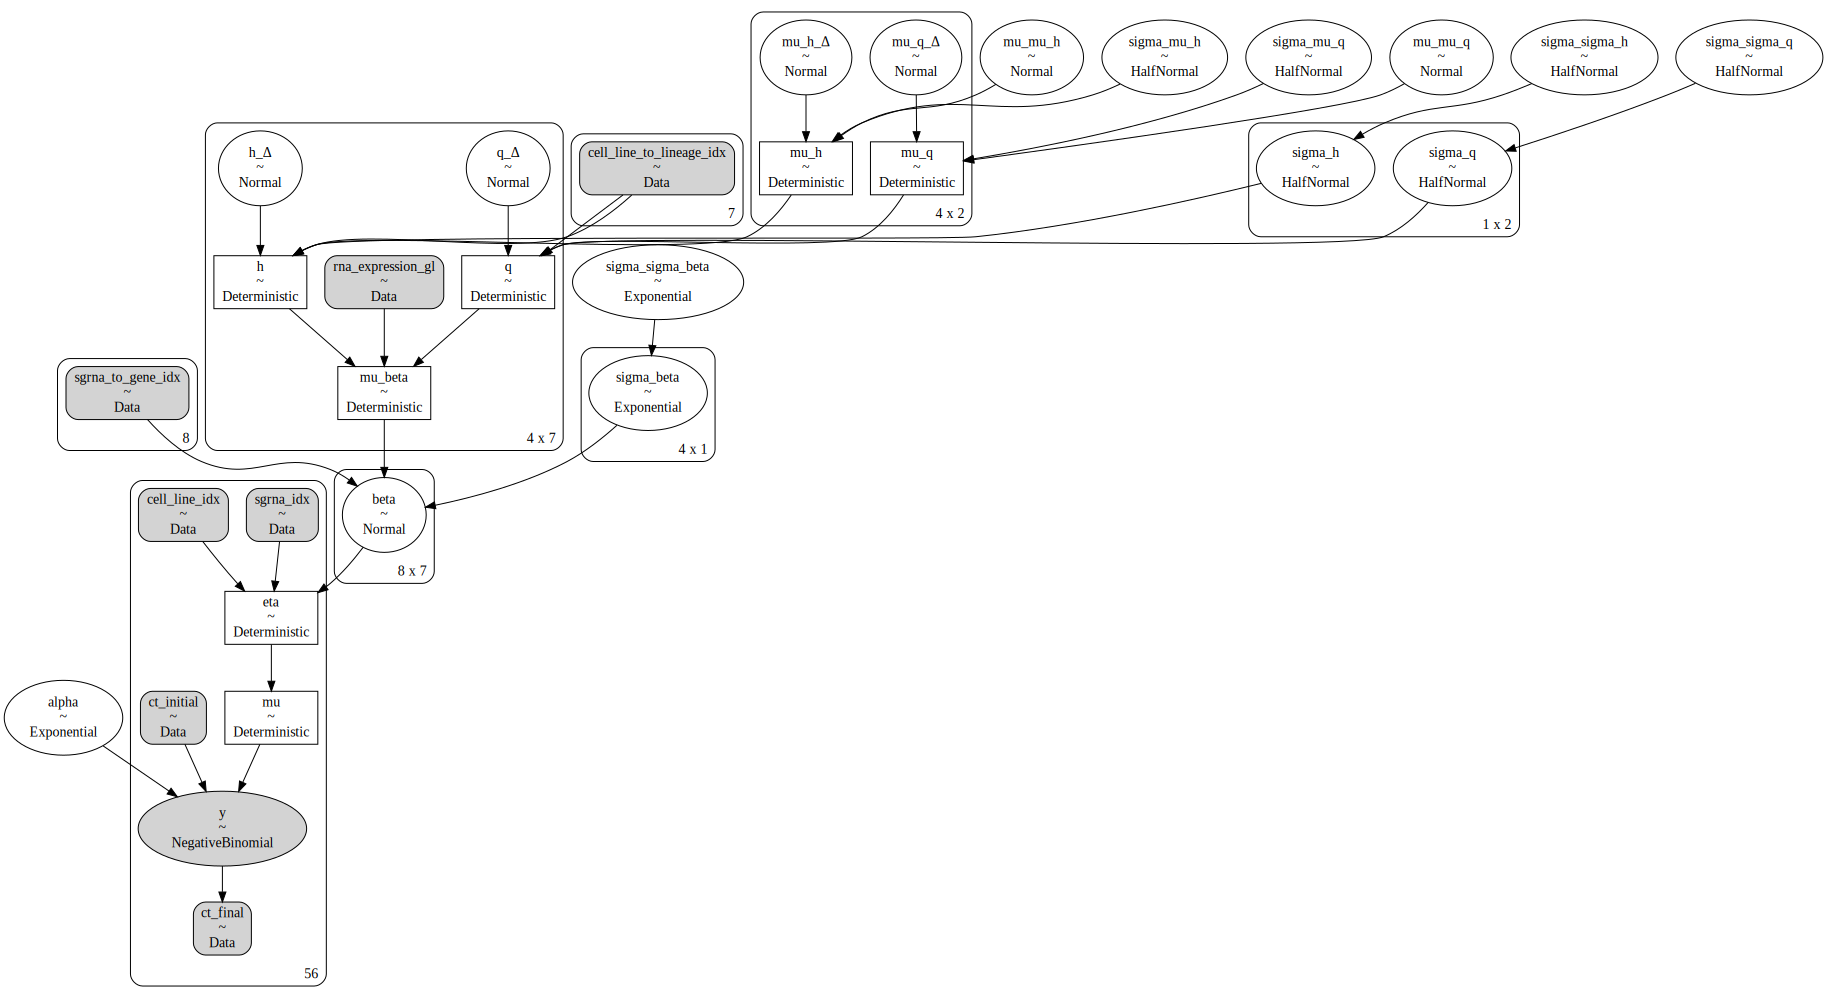

In [6]:
sp8.build_model()
pm.model_to_graphviz(sp8.model)

In [7]:
sp8.mcmc_sample_model(
    prior_pred_samples=-1,
    random_seed=9303,
    sample_kwargs={
        "draws": 1000,
        "tune": 1000,
        "init": "advi",
        "n_init": 20000,
        "target_accept": 0.95,
    },
    ignore_cache=True,
)

[11/03/21 17:03:54] INFO     Beginning MCMC sampling.                    ]8;id=345867;file:///Users/admin/Lab_Projects/speclet/src/models/speclet_model.py\speclet_model.py]8;;\:217

Auto-assigning NUTS sampler...
Initializing NUTS using advi...


Convergence achieved at 13100
Interrupted at 13,099 [65%]: Average Loss = 947.99
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha, beta, sigma_beta, sigma_sigma_beta, q_Δ, sigma_q, sigma_sigma_q, mu_q_Δ, sigma_mu_q, mu_mu_q, h_Δ, sigma_h, sigma_sigma_h, mu_h_Δ, sigma_mu_h, mu_mu_h]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 890 seconds.
There were 14 divergences after tuning. Increase `target_accept` or reparameterize.
There were 41 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


[11/03/21 17:21:01] INFO     Not sampling from prior predictive.     ]8;id=519102;file:///Users/admin/Lab_Projects/speclet/src/modeling/pymc3_sampling_api.py\pymc3_sampling_api.py]8;;\:79

                    INFO     Finished MCMC sampling - caching results.   ]8;id=198471;file:///Users/admin/Lab_Projects/speclet/src/models/speclet_model.py\speclet_model.py]8;;\:224

                    INFO     Caching InferenceData to '/Users/admin/Lab_ ]8;id=785675;file:///Users/admin/Lab_Projects/speclet/src/managers/cache_managers.py\cache_managers.py]8;;\:94
                             Projects/speclet/models/eight-default/mcmc/                     
                             inference-data.nc'.

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data
	> constant_data
	> posterior_predictive

In [8]:
if sp8.cache_manager.mcmc_cache_exists():
    sp8_trace = sp8.load_mcmc_cache()
else:
    raise CacheDoesNotExistError(sp8.cache_manager.mcmc_cache_delegate.cache_dir)

[11/03/21 17:21:03] INFO     ArvizCacheManager: MCMC cache exists.      ]8;id=877601;file:///Users/admin/Lab_Projects/speclet/src/managers/cache_managers.py\cache_managers.py]8;;\:119

                    INFO     ArvizCacheManager: MCMC cache exists.      ]8;id=629841;file:///Users/admin/Lab_Projects/speclet/src/managers/cache_managers.py\cache_managers.py]8;;\:119

                    INFO     ArvizCacheManager: MCMC cache exists.      ]8;id=68602;file:///Users/admin/Lab_Projects/speclet/src/managers/cache_managers.py\cache_managers.py]8;;\:119

In [9]:
main_var_names = [
    "alpha",
    "mu_mu_h",
    "sigma_mu_h",
    "sigma_sigma_h",
    "sigma_h",
    "h",
    "mu_mu_q",
    "sigma_mu_q",
    "sigma_sigma_q",
    "sigma_q",
    "q",
    "mu_beta",
    "sigma_sigma_beta",
    "sigma_beta",
    "beta",
]

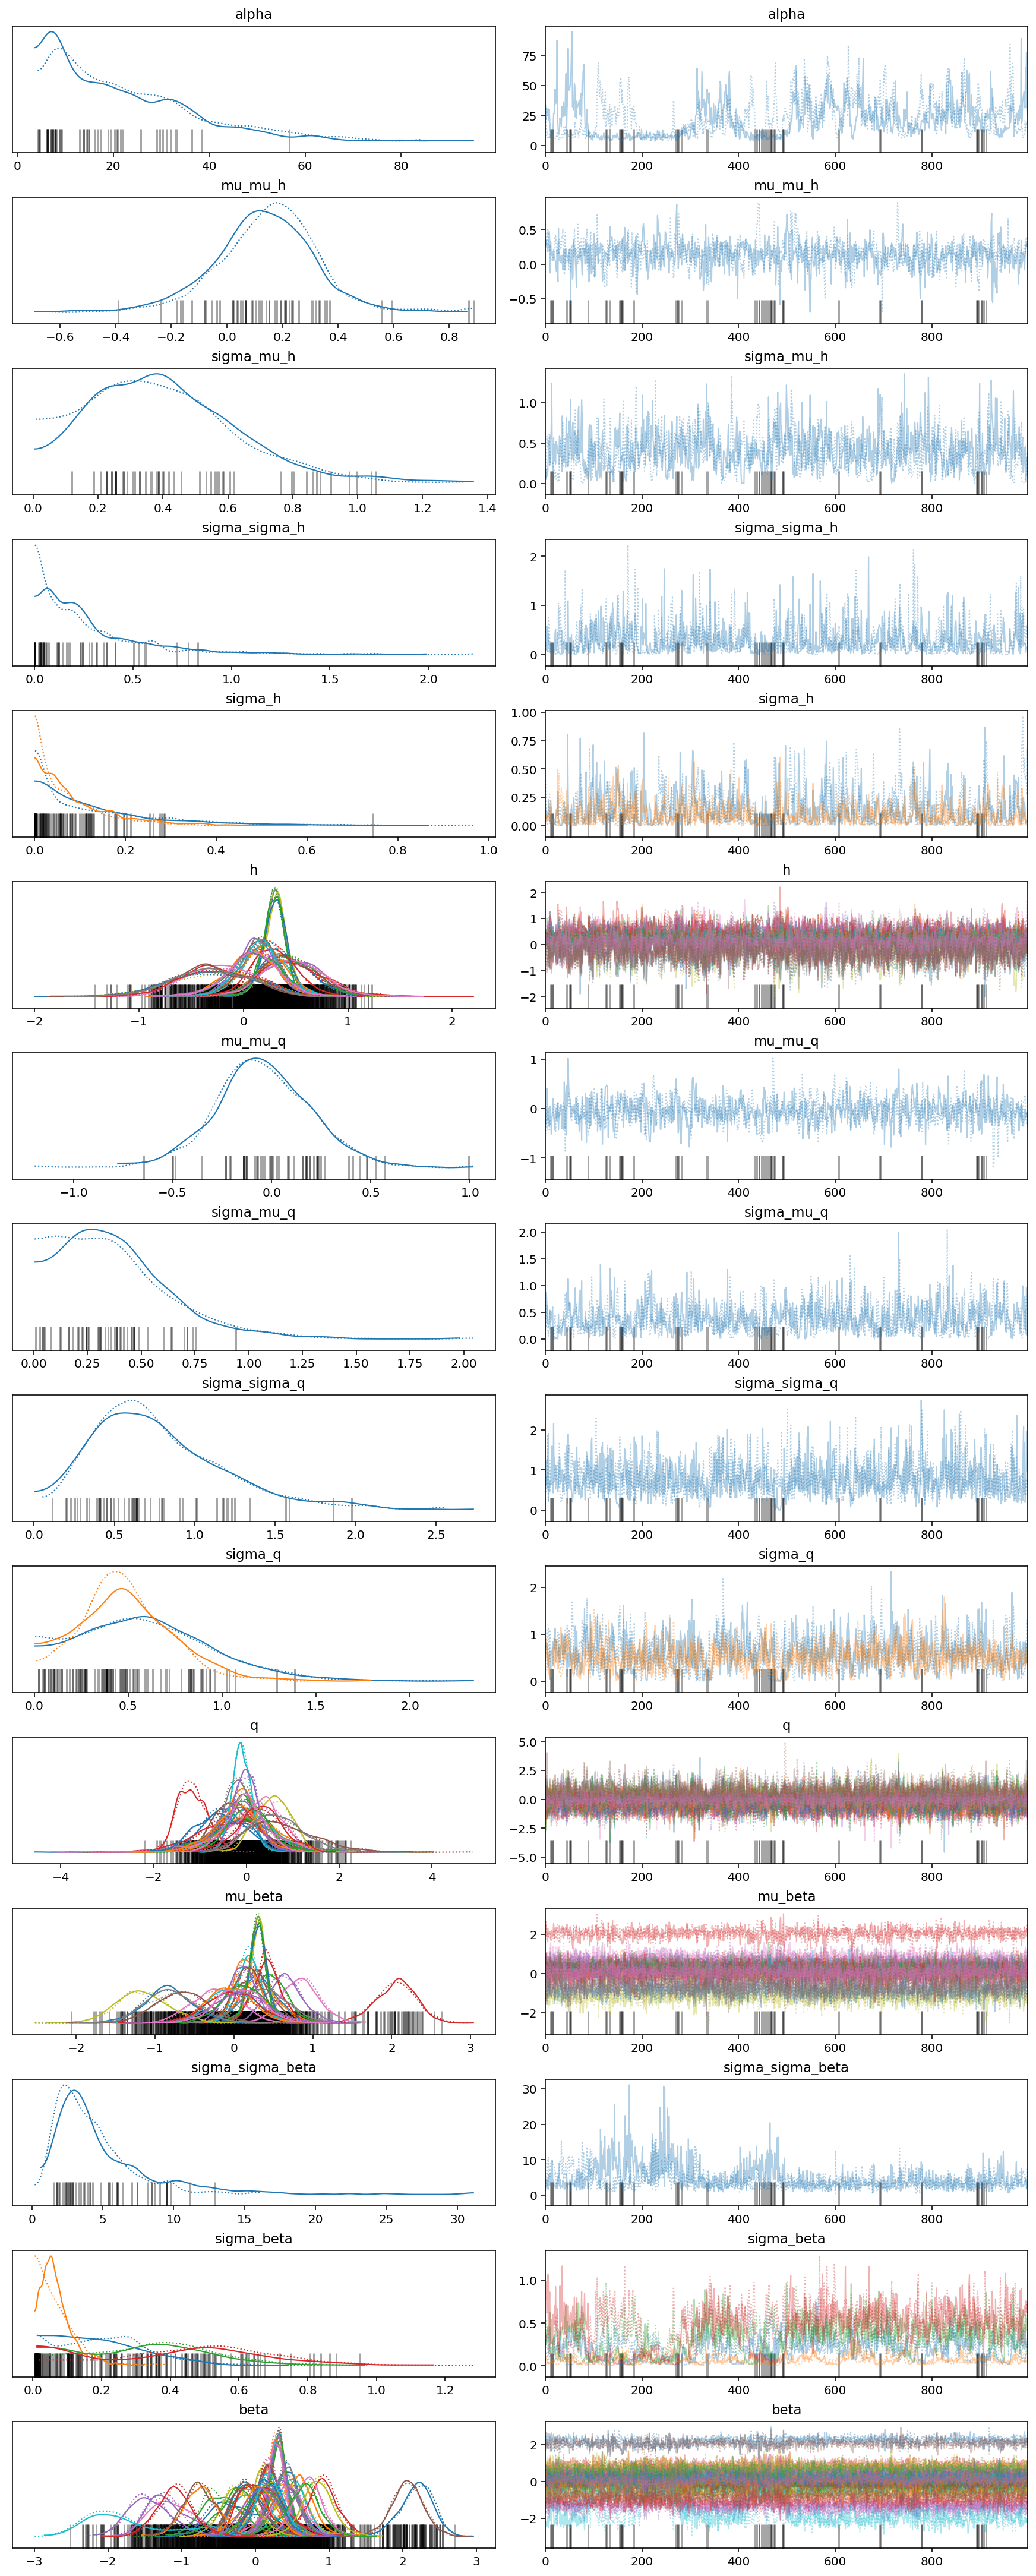

In [10]:
az.plot_trace(
    sp8_trace,
    var_names=main_var_names,
)
plt.show()

sampled 2 chains with (unknown) tuning steps and 1,000 draws
num. divergences: 14, 41
percent divergences: 1.4, 4.1
BFMI: 0.283, 0.324
avg. step size: 0.012, 0.024


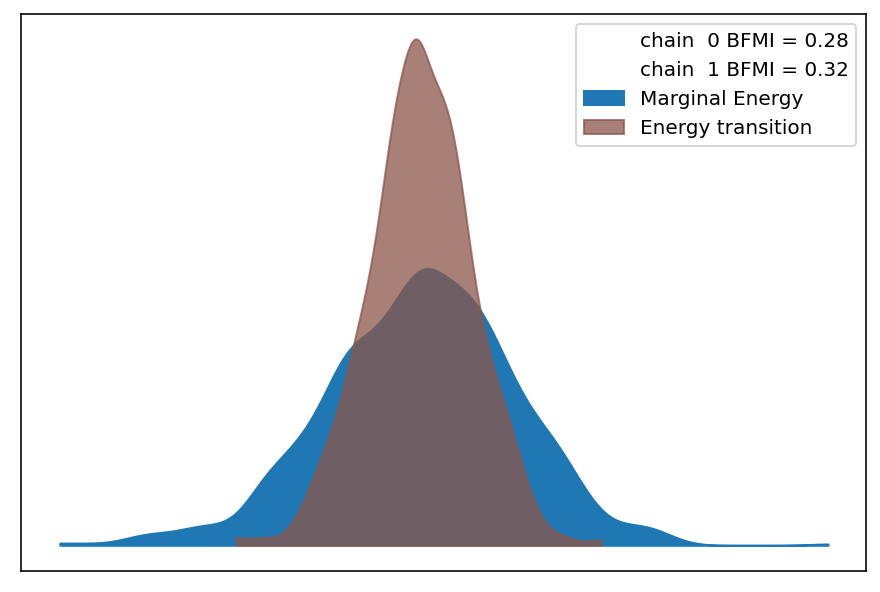

In [11]:
_ = pmanal.describe_mcmc(sp8_trace)

In [12]:
az.summary(sp8_trace, main_var_names).sort_values("r_hat", ascending=False).head(15)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"sigma_beta[3,0]",0.455,0.237,0.011,0.807,0.067,0.049,14.0,77.0,1.15
alpha,22.198,15.011,3.709,50.029,3.011,2.155,16.0,60.0,1.14
"beta[5,4]",-1.654,0.658,-2.579,-0.360,0.204,0.148,14.0,54.0,1.14
"sigma_beta[2,0]",0.343,0.182,0.026,0.643,0.041,0.030,18.0,49.0,1.11
"beta[0,0]",-0.288,0.328,-0.820,0.352,0.068,0.049,27.0,310.0,1.09
sigma_sigma_beta,4.556,3.263,0.587,10.273,0.783,0.563,27.0,34.0,1.08
"beta[4,6]",-1.173,0.317,-1.719,-0.542,0.060,0.043,31.0,207.0,1.07
"beta[0,6]",-1.128,0.320,-1.665,-0.527,0.053,0.038,41.0,252.0,1.06
"sigma_beta[0,0]",0.208,0.131,0.011,0.433,0.018,0.013,44.0,83.0,1.06
"beta[4,1]",-0.042,0.251,-0.473,0.468,0.038,0.027,49.0,346.0,1.05


---

In [13]:
notebook_toc = time()
print(f"execution time: {(notebook_toc - notebook_tic) / 60:.2f} minutes")

execution time: 17.96 minutes


In [14]:
%load_ext watermark
%watermark -d -u -v -iv -b -h -m

Last updated: 2021-11-03

Python implementation: CPython
Python version       : 3.9.6
IPython version      : 7.26.0

Compiler    : Clang 11.1.0 
OS          : Darwin
Release     : 20.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 4
Architecture: 64bit

Hostname: JHCookMac.local

Git branch: sp8-run

numpy     : 1.21.2
pymc3     : 3.11.2
pandas    : 1.3.2
matplotlib: 3.4.3
seaborn   : 0.11.2
logging   : 0.5.1.2
plotnine  : 0.8.0
arviz     : 0.11.2
sys       : 3.9.6 | packaged by conda-forge | (default, Jul 11 2021, 03:36:15) 
[Clang 11.1.0 ]

